In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [4]:
df=pd.read_csv('bank_debt_data.csv')

In [5]:
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


## Data Preprocessing and Cleaning: 

### Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [7]:
df.shape

(1882, 6)

In [9]:
df.columns

Index(['id', 'expected_recovery_amount', 'actual_recovery_amount',
       'recovery_strategy', 'age', 'sex'],
      dtype='object')

In [10]:
df.isna().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

Remarque: the data is already clean 

In [11]:
df['recovery_strategy'].unique()

array(['Level 0 Recovery', 'Level 1 Recovery', 'Level 2 Recovery',
       'Level 3 Recovery', 'Level 4 Recovery'], dtype=object)

Remarque: the banck has 5 type of recovery strategy

In [14]:
df.groupby(['recovery_strategy']).min()

,id,expected_recovery_amount,actual_recovery_amount,age,sex
recovery_strategy,,,,,
Level 0 Recovery,9,194,200.425000,18,Female
Level 1 Recovery,8,1001,433.199166,18,Female
Level 2 Recovery,7,2001,1382.577822,18,Female
Level 3 Recovery,27,3002,673.124046,23,Female
Level 4 Recovery,6,5008,588.004416,33,Female


In [17]:
df.groupby(['recovery_strategy'])['expected_recovery_amount'].agg(['min', 'max'])

,min,max
recovery_strategy,,
Level 0 Recovery,194,1000
Level 1 Recovery,1001,1997
Level 2 Recovery,2001,2992
Level 3 Recovery,3002,4987
Level 4 Recovery,5008,9964


<Axes: xlabel='expected_recovery_amount', ylabel='age'>

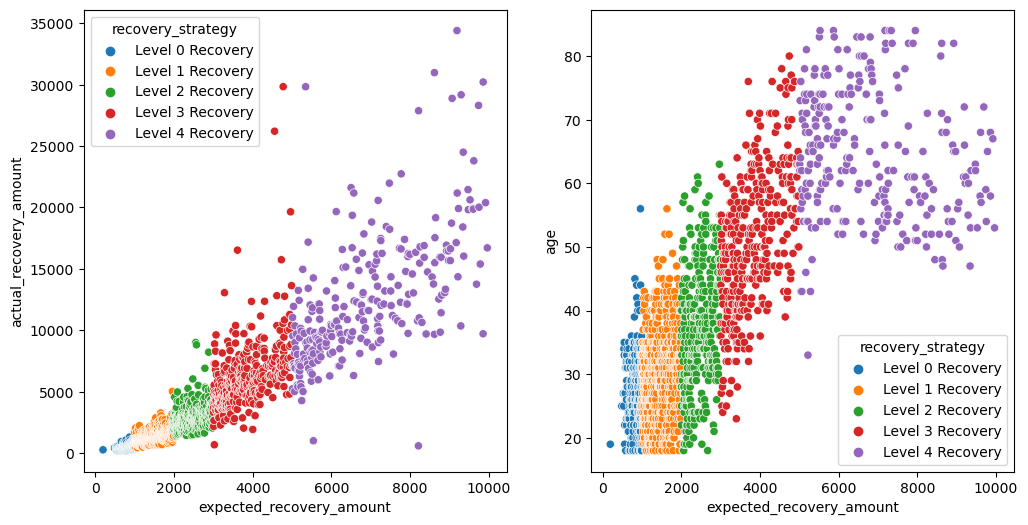

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x='expected_recovery_amount',y='actual_recovery_amount' ,hue='recovery_strategy',data=df ,ax=ax[0])
sns.scatterplot(x='expected_recovery_amount',y='age' ,hue='recovery_strategy',data=df,ax=ax[1])




so the actual recovercy amount is geting beger with the expected recoversy amount 

while the age does not same clear 

In [19]:
df_expected_recovery_amount_2000=df.loc[df.expected_recovery_amount < 2000]

In [20]:
df_expected_recovery_amount_2000

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
912,1282,1988,1475.957452,Level 1 Recovery,28,Female
913,1879,1988,2508.799693,Level 1 Recovery,34,Female
914,922,1990,2072.971170,Level 1 Recovery,40,Male
915,1025,1992,1364.515730,Level 1 Recovery,23,Male


<Axes: xlabel='expected_recovery_amount', ylabel='age'>

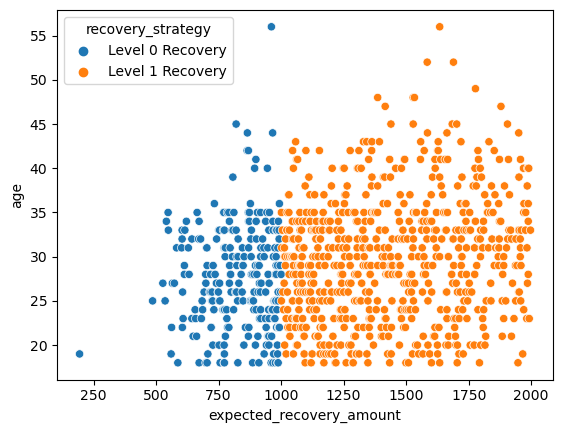

In [22]:
sns.scatterplot(x='expected_recovery_amount',y='age' ,hue='recovery_strategy',data=df_expected_recovery_amount_2000)

thr Expected Recovery Amount does not  varied systematically across the $1000 threshold but it vary smoothly so the customer age does not showing a jumb .

#### age vs. expected recovery amount

In [23]:
df_expected_recovery_amount_900_1100=df.loc[(df.expected_recovery_amount < 1100) & (df.expected_recovery_amount > 900) ]

<Axes: xlabel='expected_recovery_amount', ylabel='age'>

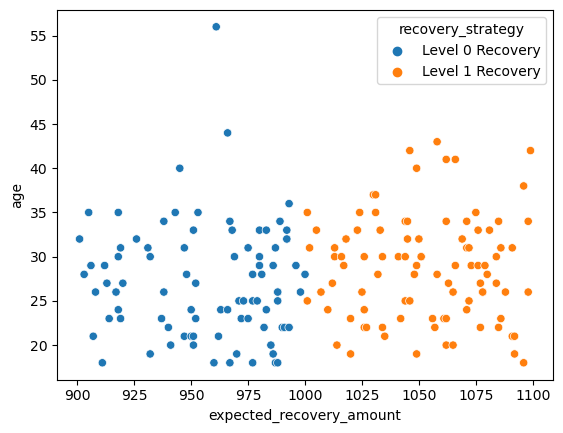

In [24]:
sns.scatterplot(x='expected_recovery_amount',y='age' ,hue='recovery_strategy',data=df_expected_recovery_amount_900_1100)


age versus Expected Recovery Amount did not show an obvious jump around $1000

#### sex vs. expected recovery amount

In [35]:
df_expected_recovery_amount_900_1100.groupby(['sex']).size()

sex
Female     70
Male      110
dtype: int64

In [40]:
per_Female=round((df_expected_recovery_amount_900_1100.groupby(['sex']).size()[0])/df_expected_recovery_amount_900_1100.shape[0] , 2)

/var/folders/6w/9_h5fcq14194n3srgpp886jm0000gn/T/ipykernel_10958/1969832083.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  per_Female=round((df_expected_recovery_amount_900_1100.groupby(['sex']).size()[0])/df_expected_recovery_amount_900_1100.shape[0] , 2)


In [41]:
per_Female

0.39

In [45]:
print('males percentage is : {} and females is : {}'.format((1-per_Female)*100,(per_Female*100)))

males percentage is : 61.0 and females is : 39.0


In [65]:
per_female_1=round((df.loc[(df['expected_recovery_amount'] > 900) & (df.expected_recovery_amount < 1000)]).groupby('sex').size()[0]/df.loc[(df['expected_recovery_amount'] > 900) & (df.expected_recovery_amount < 1000)].shape[0],2)

per_female_2=round((df.loc[(df['expected_recovery_amount'] > 1000) & (df.expected_recovery_amount < 1100)]).groupby('sex').size()[0]/df.loc[(df['expected_recovery_amount'] > 1000) & (df.expected_recovery_amount < 1100)].shape[0],2)




/var/folders/6w/9_h5fcq14194n3srgpp886jm0000gn/T/ipykernel_10958/2960935388.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  per_female_1=round((df.loc[(df['expected_recovery_amount'] > 900) & (df.expected_recovery_amount < 1000)]).groupby('sex').size()[0]/df.loc[(df['expected_recovery_amount'] > 900) & (df.expected_recovery_amount < 1000)].shape[0],2)
/var/folders/6w/9_h5fcq14194n3srgpp886jm0000gn/T/ipykernel_10958/2960935388.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  per_female_2=round((df.loc[(df['expected_recovery_amount'] > 1000) & (df.expected_recovery_amount < 1100)]).groupby('sex').size()[0]/df.lo

In [66]:
print('900-1000: males percentage is : {} and females is : {} /n 1000-1200: males percentage is : {} and females is : {}'.format((1-per_female_1)*100,(per_female_1*100),(1-per_female_2)*100,(per_female_2*100)))

900-1000: males percentage is : 64.0 and females is : 36.0 /n 1000-1200: males percentage is : 59.00000000000001 and females is : 41.0


In [67]:
print('900-1000: males percentage is: {:.2f}% and females is: {:.2f}%\n1000-1200: males percentage is: {:.2f}% and females is: {:.2f}%'.format(
    (1 - per_female_1) * 100,
    (per_female_1 * 100),
    (1 - per_female_2) * 100,
    (per_female_2 * 100)
))


900-1000: males percentage is: 64.00% and females is: 36.00%
1000-1200: males percentage is: 59.00% and females is: 41.00%


Conclude : ther is not a bige jumb in each gender percentage across the $1000 threshold

<Axes: xlabel='expected_recovery_amount', ylabel='actual_recovery_amount'>

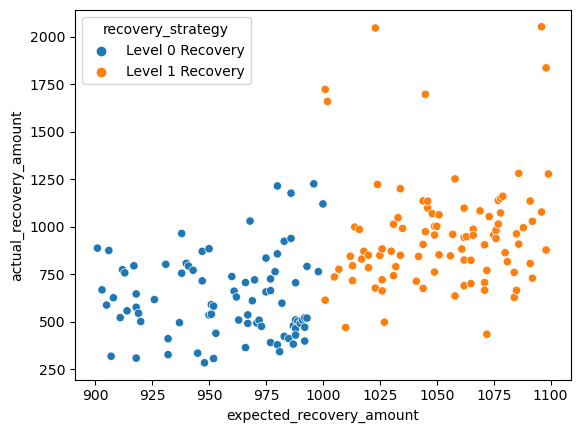

In [68]:
sns.scatterplot(x='expected_recovery_amount',y='actual_recovery_amount' ,hue='recovery_strategy',data=df_expected_recovery_amount_900_1100 )


ther is not a big jumb in actual recoversy amount betwen strategy 0 and 1 

In [69]:
df_expected_recovery_amount_950_1050=df.loc[(df.expected_recovery_amount < 1050) & (df.expected_recovery_amount > 950) ]



<Axes: xlabel='expected_recovery_amount', ylabel='actual_recovery_amount'>

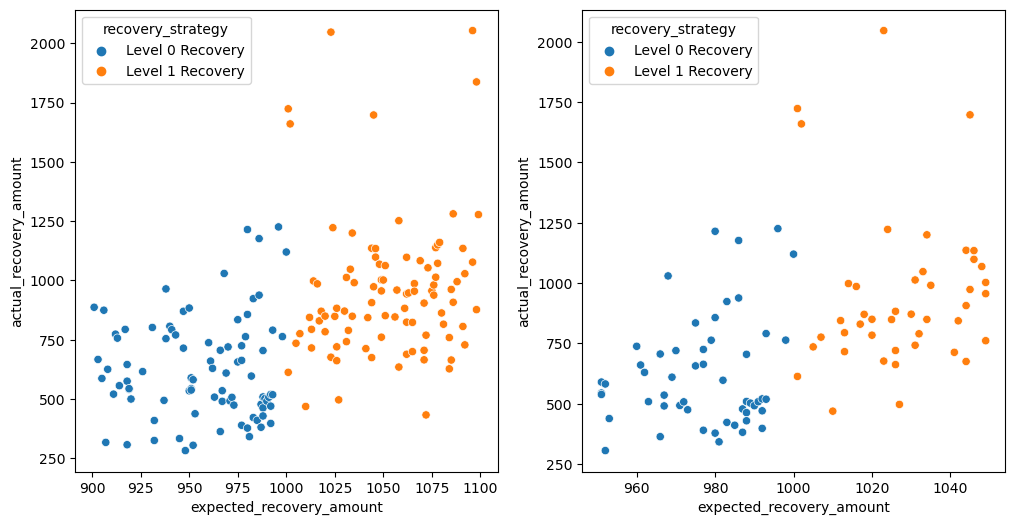

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x='expected_recovery_amount',y='actual_recovery_amount' ,hue='recovery_strategy',data=df_expected_recovery_amount_900_1100 ,ax=ax[0])
sns.scatterplot(x='expected_recovery_amount',y='actual_recovery_amount' ,hue='recovery_strategy',data=df_expected_recovery_amount_950_1050,ax=ax[1])




## The Kruskal-Wallis test 

Null Hypothesis (H0): The median ranks of the two groups are equal .
Alternative Hypothesis (H1):they are deffrente .

In [77]:
from scipy import stats


In [79]:
h_statistic_expected, p_value_expected = stats.kruskal(
    df_expected_recovery_amount_900_1100['expected_recovery_amount'], 
    df_expected_recovery_amount_950_1050['expected_recovery_amount']
)

h_statistic_actual, p_value_actual = stats.kruskal(
    df_expected_recovery_amount_900_1100['actual_recovery_amount'], 
    df_expected_recovery_amount_950_1050['actual_recovery_amount']
)

print(f'H-statistic for expected recovery: {h_statistic_expected}, p-value: {p_value_expected}')
print(f'H-statistic for actual recovery: {h_statistic_actual}, p-value: {p_value_actual}')


H-statistic for expected recovery: 1.680904548246819, p-value: 0.19480430268720178
H-statistic for actual recovery: 1.2480508142652285, p-value: 0.26392508797305225


 while p > than we can t reject the null haypothesis

Both tests show that there is no statistically significant difference

<Axes: >

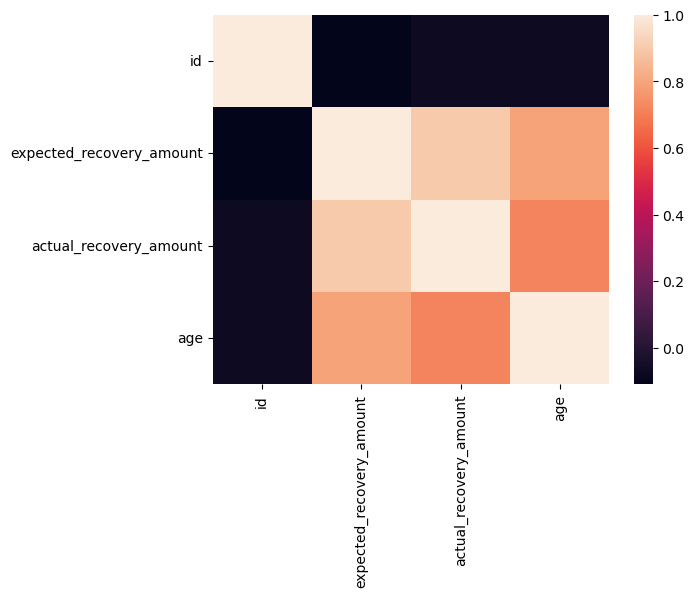

In [82]:
sns.heatmap(data=df.corr(numeric_only=True))

In [83]:
df = df.set_index('id')

In [84]:
df.head()

,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
id,,,,,
2030,194,263.540,Level 0 Recovery,19,Male
1150,486,416.090,Level 0 Recovery,25,Female
380,527,429.350,Level 0 Recovery,27,Male
1838,536,296.990,Level 0 Recovery,25,Male
1995,541,346.385,Level 0 Recovery,34,Male


<Axes: >

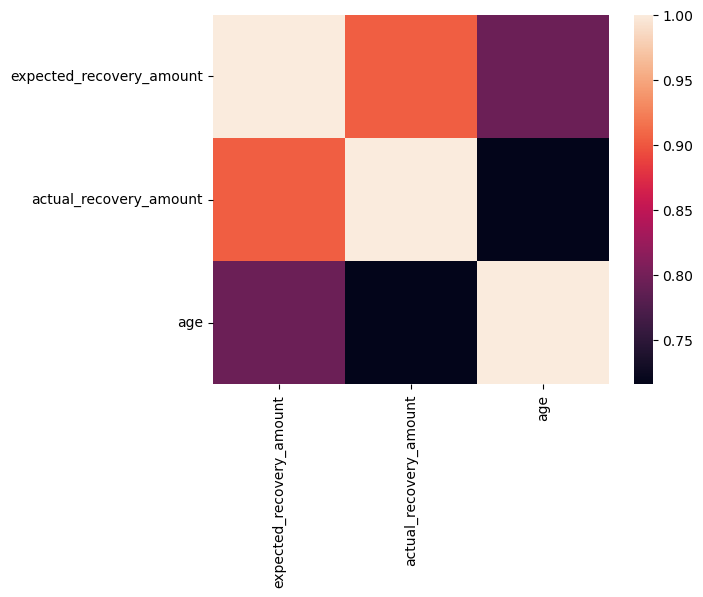

In [85]:
sns.heatmap(data=df.corr(numeric_only=True))

we can see that there is a important correlation between the expected and the actual recoversy amount 

## Data Encoding

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1882 entries, 2030 to 522
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   expected_recovery_amount  1882 non-null   int64  
 1   actual_recovery_amount    1882 non-null   float64
 2   recovery_strategy         1882 non-null   object 
 3   age                       1882 non-null   int64  
 4   sex                       1882 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 88.2+ KB


In [157]:
df_encoded=df.copy()

In [158]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1882 entries, 2030 to 522
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   expected_recovery_amount  1882 non-null   int64  
 1   actual_recovery_amount    1882 non-null   float64
 2   recovery_strategy         1882 non-null   object 
 3   age                       1882 non-null   int64  
 4   sex                       1882 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 152.8+ KB


In [159]:
df_encoded.recovery_strategy.unique()

array(['Level 0 Recovery', 'Level 1 Recovery', 'Level 2 Recovery',
       'Level 3 Recovery', 'Level 4 Recovery'], dtype=object)

In [160]:
from sklearn.preprocessing import OneHotEncoder
ont=OneHotEncoder(sparse=False,drop='first')
recovery_strategy=ont.fit_transform(df_encoded[['recovery_strategy']] )
recovery_strategy_df = pd.DataFrame(recovery_strategy,columns=ont.get_feature_names_out(['recovery_strategy']))

/Users/omarelmiujahid/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [161]:
recovery_strategy_df.head()

,recovery_strategy_Level 1 Recovery,recovery_strategy_Level 2 Recovery,recovery_strategy_Level 3 Recovery,recovery_strategy_Level 4 Recovery
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [162]:
recovery_strategy_df=recovery_strategy_df.astype(int)

In [163]:
df_encoded.reset_index(drop=True, inplace=True)


In [164]:
recovery_strategy_df.head()

,recovery_strategy_Level 1 Recovery,recovery_strategy_Level 2 Recovery,recovery_strategy_Level 3 Recovery,recovery_strategy_Level 4 Recovery
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [165]:
df_encoded.head()

,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,194,263.540,Level 0 Recovery,19,Male
1,486,416.090,Level 0 Recovery,25,Female
2,527,429.350,Level 0 Recovery,27,Male
3,536,296.990,Level 0 Recovery,25,Male
4,541,346.385,Level 0 Recovery,34,Male


In [166]:
recovery_strategy_df.reset_index(drop=True, inplace=True)


In [167]:
df_encoded=pd.concat([df_encoded,recovery_strategy_df],axis=1)

In [168]:
df_encoded.head()

,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,recovery_strategy_Level 1 Recovery,recovery_strategy_Level 2 Recovery,recovery_strategy_Level 3 Recovery,recovery_strategy_Level 4 Recovery
0,194,263.540,Level 0 Recovery,19,Male,0,0,0,0
1,486,416.090,Level 0 Recovery,25,Female,0,0,0,0
2,527,429.350,Level 0 Recovery,27,Male,0,0,0,0
3,536,296.990,Level 0 Recovery,25,Male,0,0,0,0
4,541,346.385,Level 0 Recovery,34,Male,0,0,0,0


In [169]:
print(df_encoded['recovery_strategy'].isnull().sum())


0


In [170]:
df_encoded.drop('recovery_strategy' , axis=1 , inplace=True)

In [171]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   expected_recovery_amount            1882 non-null   int64  
 1   actual_recovery_amount              1882 non-null   float64
 2   age                                 1882 non-null   int64  
 3   sex                                 1882 non-null   object 
 4   recovery_strategy_Level 1 Recovery  1882 non-null   int64  
 5   recovery_strategy_Level 2 Recovery  1882 non-null   int64  
 6   recovery_strategy_Level 3 Recovery  1882 non-null   int64  
 7   recovery_strategy_Level 4 Recovery  1882 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 117.8+ KB


In [176]:
del  df_encoded_copy

In [177]:
df_encoded['sex']=df_encoded['sex'].map(lambda sex : 1 if sex=='Male' else 0 )

In [178]:
df_encoded.sex.unique()

array([1, 0])

In [179]:
df.sex.unique()

array(['Male', 'Female'], dtype=object)

In [180]:
df_encoded.groupby('sex').size()

sex
0    909
1    973
dtype: int64

In [181]:
df_encoded.shape

(1882, 8)

In [182]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   expected_recovery_amount            1882 non-null   int64  
 1   actual_recovery_amount              1882 non-null   float64
 2   age                                 1882 non-null   int64  
 3   sex                                 1882 non-null   int64  
 4   recovery_strategy_Level 1 Recovery  1882 non-null   int64  
 5   recovery_strategy_Level 2 Recovery  1882 non-null   int64  
 6   recovery_strategy_Level 3 Recovery  1882 non-null   int64  
 7   recovery_strategy_Level 4 Recovery  1882 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 117.8 KB


our data is encoded now 

# Apply Algorithms

In [183]:
df_encoded.head()

,expected_recovery_amount,actual_recovery_amount,age,sex,recovery_strategy_Level 1 Recovery,recovery_strategy_Level 2 Recovery,recovery_strategy_Level 3 Recovery,recovery_strategy_Level 4 Recovery
0,194,263.540,19,1,0,0,0,0
1,486,416.090,25,0,0,0,0,0
2,527,429.350,27,1,0,0,0,0
3,536,296.990,25,1,0,0,0,0
4,541,346.385,34,1,0,0,0,0


In [257]:
X_train=df_encoded.copy()

In [258]:
X_train=X_train.drop('actual_recovery_amount',axis=1)

In [259]:
X_train.head()

,expected_recovery_amount,age,sex,recovery_strategy_Level 1 Recovery,recovery_strategy_Level 2 Recovery,recovery_strategy_Level 3 Recovery,recovery_strategy_Level 4 Recovery
0,194,19,1,0,0,0,0
1,486,25,0,0,0,0,0
2,527,27,1,0,0,0,0
3,536,25,1,0,0,0,0
4,541,34,1,0,0,0,0


In [260]:
y_train = df_encoded['actual_recovery_amount']

In [261]:
y_train.head()

0    263.540
1    416.090
2    429.350
3    296.990
4    346.385
Name: actual_recovery_amount, dtype: float64

In [262]:
from sklearn import linear_model 
reg = linear_model.LinearRegression()

In [263]:
from sklearn.preprocessing import StandardScaler
StandardScaler=StandardScaler()

In [264]:
X_train=X_train.drop(['age', 'sex'] ,axis=1)

In [256]:
X_train_after_scaling=StandardScaler.fit_transform(X_train)
sgdr.fit(X_train_after_scaling,y_train)
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters: w: {w_norm}, b:{b_norm}")
y_pred_sgd = sgdr.predict(X_train_after_scaling)

model parameters: w: [4182.89014753 -211.08543555 -353.9861497  -146.19310397 -181.12057948], b:[4011.03482355]


In [265]:
y_pred_sgd[:5]

array([-837.97101787, -233.10297128, -148.17286885, -129.52967563,
       -119.17234607])

for  1000$  threshold 

In [266]:
df_expected_recovery_amount_900_1100_encoded=df_encoded.loc[(df_encoded.expected_recovery_amount < 1100) & (df_encoded.expected_recovery_amount > 900) ]




In [267]:
df_expected_recovery_amount_900_1100_encoded.head()

,expected_recovery_amount,actual_recovery_amount,age,sex,recovery_strategy_Level 1 Recovery,recovery_strategy_Level 2 Recovery,recovery_strategy_Level 3 Recovery,recovery_strategy_Level 4 Recovery
161,901,887.005,32,1,0,0,0,0
162,903,667.035,28,1,0,0,0,0
163,905,586.960,35,0,0,0,0,0
164,906,874.560,29,1,0,0,0,0
165,907,317.335,21,1,0,0,0,0


In [268]:
X_trin_around_1000=df_expected_recovery_amount_900_1100_encoded.copy()

In [269]:
X_trin_around_1000=X_trin_around_1000.drop(['sex','age','actual_recovery_amount'],axis=1)

In [270]:
X_trin_around_1000.head()

,expected_recovery_amount,recovery_strategy_Level 1 Recovery,recovery_strategy_Level 2 Recovery,recovery_strategy_Level 3 Recovery,recovery_strategy_Level 4 Recovery
161,901,0,0,0,0
162,903,0,0,0,0
163,905,0,0,0,0
164,906,0,0,0,0
165,907,0,0,0,0


In [271]:
y_trin_around_1000=df_expected_recovery_amount_900_1100_encoded['actual_recovery_amount']

In [272]:
y_trin_around_1000.head()

161    887.005
162    667.035
163    586.960
164    874.560
165    317.335
Name: actual_recovery_amount, dtype: float64

In [273]:
X_trin_around_1000_after_Scaling=StandardScaler.fit_transform(X_trin_around_1000)
sgdr.fit(X_trin_around_1000_after_Scaling,y_trin_around_1000)
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters: w: {w_norm}, b:{b_norm}")
y_pred_sgd_around_1000 = sgdr.predict(X_trin_around_1000_after_Scaling)

model parameters: w: [ 50.86332341 119.17677862   0.           0.           0.        ], b:[798.26921804]


In [275]:
y_pred_sgd_around_1000[:5]

array([575.88832197, 577.72944806, 579.57057416, 580.4911372 ,
       581.41170025])

In [276]:
y_trin_around_1000[:5]

161    887.005
162    667.035
163    586.960
164    874.560
165    317.335
Name: actual_recovery_amount, dtype: float64

In [277]:
from sklearn.metrics import r2_score

r2 = r2_score(y_train, y_pred_sgd)

print(f"R-squared (R²)for first module : {r2}")

R-squared (R²)for first module : 0.8200697207656562


In [278]:

r2_around_1000 = r2_score(y_trin_around_1000, y_pred_sgd_around_1000)

print(f"R-squared (R²)for seconde module : {r2_around_1000}")

R-squared (R²)for seconde module : 0.29540585761463


In [281]:
df_expected_recovery_amount_950_1050_encoded = df_encoded.loc[
    (df_encoded.expected_recovery_amount < 1050) & 
    (df_encoded.expected_recovery_amount > 950)
]

X_trin_around_1050 = df_expected_recovery_amount_950_1050_encoded.copy()

X_trin_around_1050 = X_trin_around_1050.drop(['sex', 'age', 'actual_recovery_amount'], axis=1)

y_trin_around_1050 = df_expected_recovery_amount_950_1050_encoded['actual_recovery_amount']

X_trin_around_1050_after_scaling = StandardScaler.fit_transform(X_trin_around_1050)

sgdr.fit(X_trin_around_1050_after_scaling, y_trin_around_1050)

b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"Model parameters: w: {w_norm}, b: {b_norm}")

y_pred_sgd_around_1050 = sgdr.predict(X_trin_around_1050_after_scaling)

r2_around_1050 = r2_score(y_trin_around_1050, y_pred_sgd_around_1050)

print(f"R-squared (R²) for second model: {r2_around_1050}")


Model parameters: w: [ 66.83808949 101.90991079   0.           0.           0.        ], b: [770.29922377]
R-squared (R²) for second model: 0.2704430280274649
